In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
data=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv") #train dataset
test=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv") #test dataset
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
data.shape,test.shape

((7613, 5), (3263, 4))

In [4]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
data=data.drop(["location"],axis=1)

In [6]:
data.fillna(data.median(),inplace=True) #filling null values

In [7]:
data=data.drop(['keyword'],axis=1)

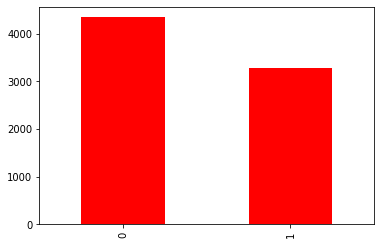

In [8]:
#checking total no of positive and negative tweets
data.target.value_counts().plot(kind='bar',color='red') 
plt.show()

In [9]:
import re   #for replacing
import nltk  #for natural language processing
from nltk.corpus import stopwords   #importing stopwords
Stop=stopwords.words('english')
stemmer=nltk.SnowballStemmer("english")

In [10]:
#text preprocessing for clean text.
def newtweet(text):
    text=str(text).lower()
    text=re.sub(r'@\s+|http\s+|www.\s+|\n','',text) #removing links and urls
    text=re.sub(r'[^A-Za-z0-9\s]+','',text) #removing special characters
    text=[stemmer.stem(word)for word in text.split(' ')] #stemming process
    text=" ".join([word for word in text if word not in Stop]) #checking for stopwords
    text=text.strip()
    return text #returning clean text

In [11]:
data["text"]=data["text"].apply(newtweet) #applying newtext in text column in train dataset

In [12]:
test['text']=test['text'].apply(newtweet) #applying newtext in text  column in test dataset

In [13]:
test=test.drop({"keyword","location"},axis=1) #dropping columns from test dataset

In [14]:
#creating train datas
trainx=data['text'] 
trainy=data['target']

In [15]:
#creating test data.
testx=test['text']

In [16]:
from sklearn.naive_bayes import MultinomialNB #naive_bayes algorithm.
from sklearn.pipeline import make_pipeline #making pipeline.
from sklearn.feature_extraction.text import TfidfVectorizer #vectorizing the text using frequencies.

In [17]:
#creating the model
model=make_pipeline(TfidfVectorizer(ngram_range=(1,2)),MultinomialNB(alpha=1.0))

In [18]:
model.fit(trainx,trainy)
output=model.predict(testx)
output

array([1, 0, 1, ..., 1, 1, 1])

In [19]:
submission=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
submission.head(3)

,id,target
0,0,0
1,2,0
2,3,0


In [20]:
submission["target"]=output

In [21]:
submission.head(10)

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [22]:
submission.to_csv("nlp_submission.csv",index=False)